In [145]:
!pip install seaborn scipy

  Obtaining dependency information for numpy!=1.24.0,>=1.17 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompati

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.stats import pearsonr
import ast
# Load the dataset
data = pd.read_csv('book_dataset.csv')
columns_to_keep = ['title', 'author_name', 'ratings_average', 'ratings_count', 'subject','first_publish_year','key','language','readinglog_count',]
data = data[columns_to_keep]
data.tail(20)

/var/folders/4m/ykffh7vn0mjdcbcw9mrnzvt80000gn/T/ipykernel_74709/230437597.py:10: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('book_dataset.csv')


,title,author_name,ratings_average,ratings_count,subject,first_publish_year,key,language,readinglog_count
9980,Learn Cocoa on the Mac,['Jack Nutting'],NaN,NaN,"['Mac OS', 'Application program interfaces (Co...",2011.0,/works/OL19548291W,['eng'],NaN
9981,Experimental Research in Evolutionary Computation,['Thomas Bartz-Beielstein'],NaN,NaN,['Evolutionary programming (Computer science)'...,2006.0,/works/OL9032175W,['eng'],0.0
9982,Unified software engineering with Java,"['Georges G. Merx', 'Ronald J. Norman']",NaN,NaN,"['Java (Computer program language)', 'Object-o...",2006.0,/works/OL17837699W,['eng'],NaN
9983,Handbook of Visual Display Technology,['Janglin Chen'],NaN,NaN,"['Computer Imaging, Vision, Pattern Recognitio...",2012.0,/works/OL19854591W,['eng'],NaN
9984,"MARINE 2011, IV International Conference on Co...",['Luís Eça'],NaN,NaN,"['Offshore Engineering', 'Computational Mathem...",2013.0,/works/OL19885728W,['eng'],NaN
9985,Multi-objective optimization using evolutionar...,['Kalyanmoy Deb'],NaN,NaN,['Evolutionary programming (Computer science)'...,2001.0,/works/OL8244342W,['eng'],NaN
9986,Computational neural networks for geophysical ...,['M.M. Poulton'],NaN,NaN,"['Geophysical methods', 'Neural networks (Comp...",2001.0,/works/OL16976910W,['eng'],0.0
9987,Proceedings,"['TENCON (1993 Beijing, China)', 'China) Trend...",NaN,NaN,"['Automatic control', 'Computer networks', 'Co...",1993.0,/works/OL3969132W,['eng'],0.0
9988,Logic Programming with Prolog,['Max Bramer'],NaN,NaN,"['Logic programming', 'Prolog (computer progra...",2005.0,/works/OL25619085W,['eng'],0.0
9989,Elements of computer science,"['J. Jha', 'P. K. Mahanti', 'L. Sahoo']",NaN,NaN,"['Computer science', 'General Theory of Comput...",1996.0,/works/OL19031513W,['eng'],NaN


## 1)Dataset Overview
Let's check for missing values and get a basic understanding of the data distribution.

In [107]:

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10000 non-null  object 
 1   author_name         9967 non-null   object 
 2   ratings_average     719 non-null    float64
 3   ratings_count       719 non-null    float64
 4   subject             10000 non-null  object 
 5   first_publish_year  9991 non-null   float64
 6   key                 10000 non-null  object 
 7   language            9559 non-null   object 
 8   readinglog_count    6693 non-null   float64
dtypes: float64(4), object(5)
memory usage: 703.3+ KB


title                    0
author_name             33
ratings_average       9281
ratings_count         9281
subject                  0
first_publish_year       9
key                      0
language               441
readinglog_count      3307
dtype: int64

## 2) Data Preprocessing and feature engineering
We'll clean the data, fill in or drop missing values, and ensure correct data types for analysis.

In [108]:
# Drop rows with missing essential values in title or author_name columns
data.dropna(subset=['title', 'author_name'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9967 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               9967 non-null   object 
 1   author_name         9967 non-null   object 
 2   ratings_average     717 non-null    float64
 3   ratings_count       717 non-null    float64
 4   subject             9967 non-null   object 
 5   first_publish_year  9960 non-null   float64
 6   key                 9967 non-null   object 
 7   language            9528 non-null   object 
 8   readinglog_count    6667 non-null   float64
dtypes: float64(4), object(5)
memory usage: 778.7+ KB


Handling missing values for Different Features


In [109]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*50)
  print('Missing Data Percentage')
  print(round(x[show_missing(x)].isnull().sum().sort_values(ascending = False)/len(x)*100,2))

In [110]:
print_missing(data)

Missing Data Count
ratings_average       9250
ratings_count         9250
readinglog_count      3300
language               439
first_publish_year       7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
ratings_average       92.81
ratings_count         92.81
readinglog_count      33.11
language               4.40
first_publish_year     0.07
dtype: float64


#### Handling the missing values of readinglog_count

In [111]:
# Null values in readinglog_count column
nulls = sum(data['readinglog_count'].isnull())
print('Null values in readinglog_count: ',nulls)

Null values in readinglog_count:  3300


In [112]:
# Replacing null values
median = data['readinglog_count'].median()
std = data['readinglog_count'].std()
random_readingCount = np.random.randint(median - std, median + std, size = nulls)
readingCount = data['readinglog_count'].copy()
readingCount[pd.isnull(readingCount)] = random_readingCount
data['readinglog_count'] = readingCount
data['readinglog_count'] = data['readinglog_count'].astype(int)

## **Exploratory Data Analysis**

In [113]:
print(data.columns)
print(data.ratings_average)

Index(['title', 'author_name', 'ratings_average', 'ratings_count', 'subject',
       'first_publish_year', 'key', 'language', 'readinglog_count'],
      dtype='object')
0       4.163793
1       4.233766
2       3.605263
3       3.970149
4       4.350000
          ...   
9995         NaN
9996         NaN
9997         NaN
9998         NaN
9999         NaN
Name: ratings_average, Length: 9967, dtype: float64


## 1. Book Ratings_avg V/S Ratings_count

In [114]:
# Group by 'ratings_average' and sum 'ratings_count'
ratings_df = data.groupby('ratings_average', as_index=False).agg({'ratings_count': 'sum'})

# Display the new DataFrame
print(ratings_df)


    ratings_average  ratings_count
0          1.000000           23.0
1          1.500000            2.0
2          1.666667            3.0
3          2.000000           38.0
4          2.333333            6.0
..              ...            ...
71         4.551724           29.0
72         4.625000            8.0
73         4.666666           30.0
74         4.800000            5.0
75         5.000000          274.0

[76 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


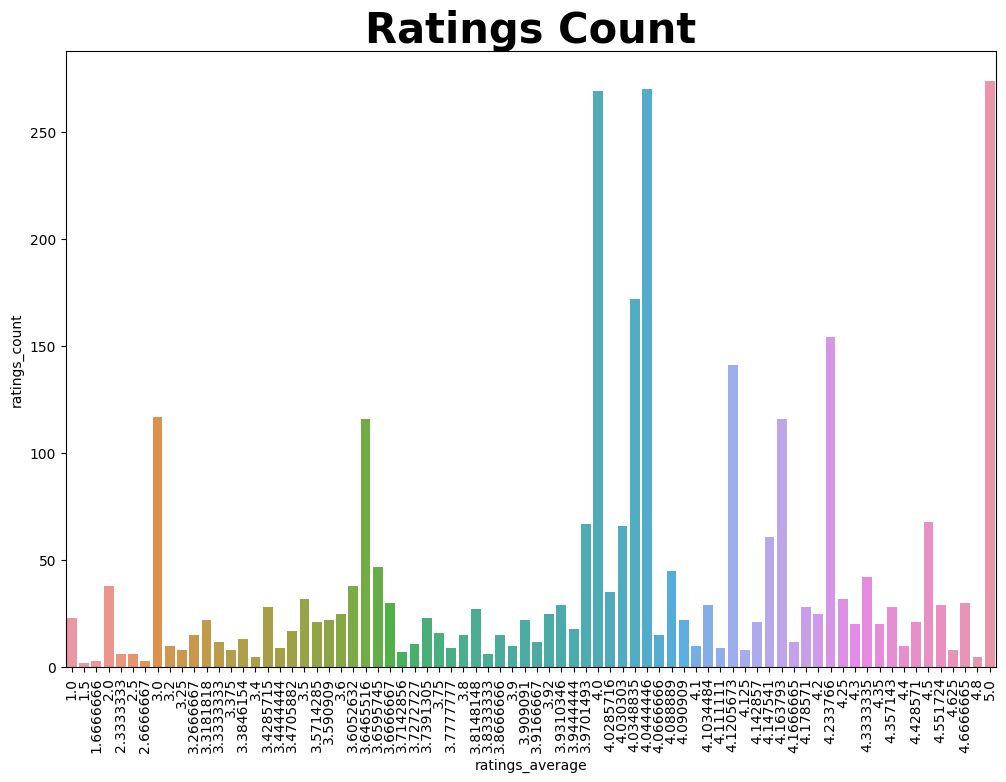

In [115]:
#plot between ratings_count and the rating of the book

plt.figure(figsize=(12, 8))
ax = sns.barplot(x = 'ratings_average' , y = 'ratings_count', data = ratings_df)
ax.set_title('Ratings Count', fontsize=30, fontweight='bold')
plt.xticks(rotation=90) 
plt.show()

Conclusion : the books ratings are distributed and there is no skewness

## 2. Author V/S Ratings

In [116]:
auth_rating = data.groupby(['author_name'])['ratings_count'].count().sort_values(ascending=False).reset_index()

In [117]:
print(auth_rating)
filtered_data = auth_rating[auth_rating['ratings_count'] > 1]
print(filtered_data)

                                            author_name  ratings_count
0                                       ['Ken MacLeod']              4
1                                   ['Neal Stephenson']              4
2                                   ['Terry Pratchett']              4
3                                     ['James Dashner']              4
4                                    ['Charles Stross']              4
...                                                 ...            ...
8905  ['Hanning Yuan', 'Jing Geng', 'Chuanlu Liu', '...              0
8906          ['Hannes Werthner', 'Frank van Harmelen']              0
8907                                 ['Hannes Gredler']              0
8908                             ['Hannakaisa Isomäki']              0
8909                                    ['Øyvind Grøn']              0

[8910 rows x 2 columns]
                                   author_name  ratings_count
0                              ['Ken MacLeod']              4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


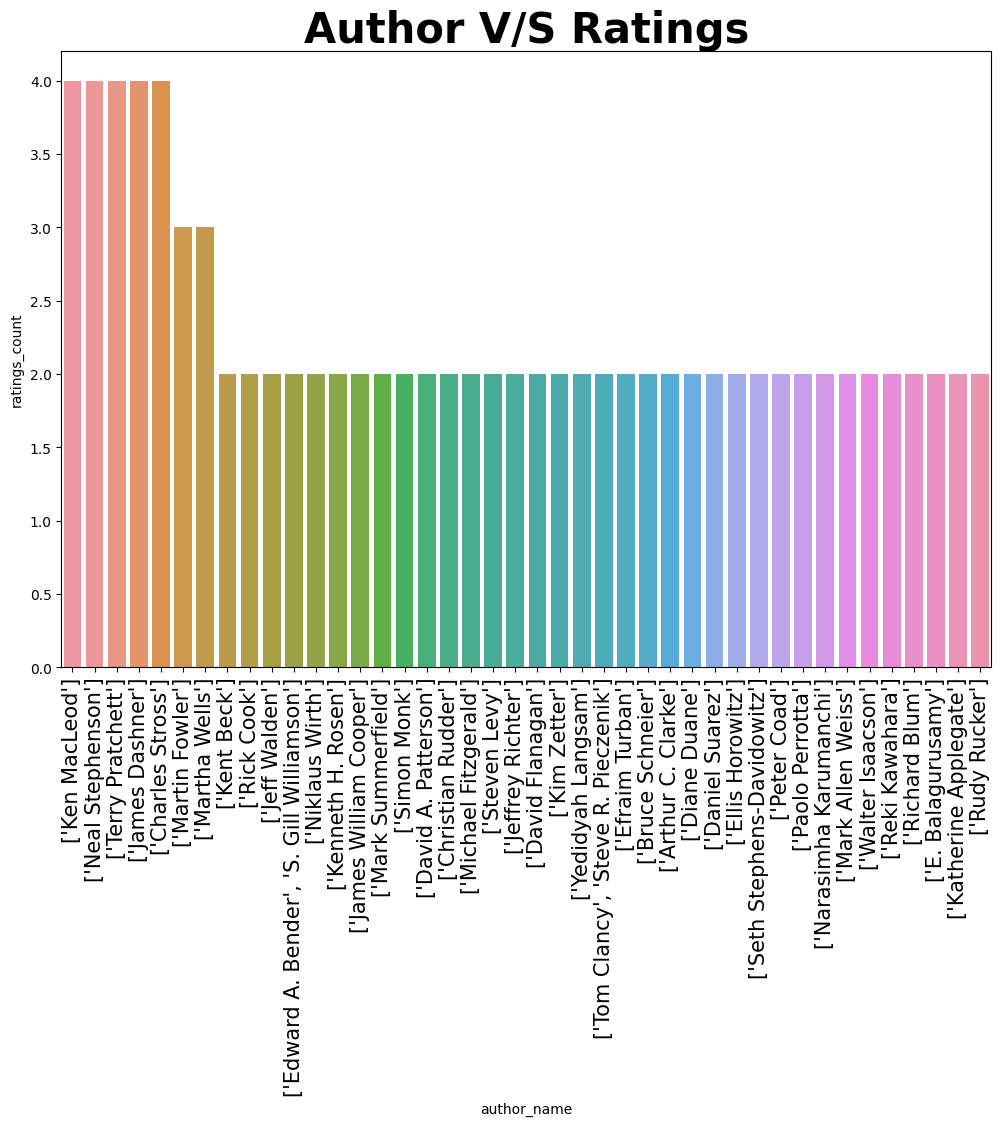

In [118]:
plt.figure(figsize=(12,8))
filtered_data = auth_rating[auth_rating['ratings_count'] > 1]
ax = sns.barplot(x='author_name' , y = 'ratings_count', data = filtered_data)
ax.set_title('Author V/S Ratings', fontsize = 30 , fontweight = 'bold')
plt.xticks(fontsize = 15, rotation = 90)
plt.show()


# 3) Building Models

## 1) Top 10 books for respective authors

## 2) Content based filtering

In [119]:
!pip install nltk
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
import string

In [120]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivamgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/shivamgarg/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [121]:
stopwords.words('english').extend(['\n','\t'])

In [122]:
#combined feature string
data['combined_features']=data['title']+' '+data['author_name']+' '+data['subject'].astype(str)
data[['title','combined_features']].head()

,title,combined_features
0,2001,2001 ['Arthur C. Clarke'] ['Human-computer int...
1,"I, Robot","I, Robot ['Isaac Asimov'] ['smear campaigns', ..."
2,Prey,"Prey ['Michael Crichton'] ['programmers', 'nan..."
3,Neuromancer,Neuromancer ['William Gibson'] ['Information s...
4,Artemis Fowl and the Eternity Code,Artemis Fowl and the Eternity Code ['Eoin Colf...


In [123]:
#Removing Stop Words and Punctuations
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
data['title']=data['title'].apply(text_process)

In [124]:
nltk.download('wordnet')
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

def lemma(text):    
    '''a function which stems each word in the given text'''
    text = [wnl.lemmatize(word) for word in text.split()]
    return " ".join(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shivamgarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [125]:
data['title']=data['title'].apply(lemma)

#### Vectorizing the data

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [127]:
# Vectorize the combined features
tfidf = TfidfVectorizer(min_df=5)
tfidf_matrix = tfidf.fit_transform(data['combined_features'])
print(tfidf_matrix)

  (0, 39)	0.12568055770078526
  (0, 303)	0.12840774293076415
  (0, 642)	0.13660817112538937
  (0, 1574)	0.15304364726940953
  (0, 739)	0.019343693407284812
  (0, 1680)	0.08066573521264163
  (0, 741)	0.042313455188065695
  (0, 1233)	0.720854504417303
  (0, 2959)	0.09501464304516312
  (0, 3384)	0.15179820964433527
  (0, 1251)	0.11802022496028657
  (0, 573)	0.13161144840051617
  (0, 3100)	0.23284281976314053
  (0, 3437)	0.13906178134736663
  (0, 2009)	0.12840774293076415
  (0, 2350)	0.13660817112538937
  (0, 2052)	0.11931780735916513
  (0, 1267)	0.05788236861317523
  (0, 637)	0.11002135032521801
  (0, 1118)	0.23863561471833025
  (0, 1492)	0.126325353050398
  (0, 3367)	0.14042349917590508
  (0, 1534)	0.10239174979115188
  (0, 1685)	0.12170750523168844
  (0, 2013)	0.14042349917590508
  :	:
  (9965, 2210)	0.15417514468800272
  (9965, 2029)	0.2719469234997857
  (9965, 2837)	0.18172059747715053
  (9965, 2303)	0.14212189960274454
  (9965, 68)	0.23488382509422615
  (9965, 1057)	0.219389833356313

In [ ]:
import numpy as np

dot_product = np.dot(tfidf_matrix, tfidf_matrix.T)

magnitude = np.sqrt(dot_product.diagonal()).reshape(-1, 1)

cosine_sim_scratch = dot_product / (magnitude @ magnitude.T)

cosine_sim_scratch_df = pd.DataFrame(cosine_sim_scratch.toarray(), index=data['title'], columns=data['title'])

print(cosine_sim_scratch_df)

title                                                   2001     Robot  \
title                                                                    
2001                                                1.000000  0.531587   
Robot                                               0.531587  1.000000   
Prey                                                0.575840  0.501415   
Neuromancer                                         0.489686  0.675828   
Artemis Fowl Eternity Code                          0.577634  0.633243   
...                                                      ...       ...   
Visual Basic NET allinone desk reference dummy      0.015028  0.011155   
Introducing Elixir Getting Started Functional P...  0.008100  0.006863   
Genetic programming IV                              0.009959  0.023487   
Natural Language Processing Java Techniques bui...  0.021476  0.013689   
Objectoriented technology computing system reen...  0.011612  0.008117   

title                                

In [129]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert cosine similarity to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])

print(cosine_sim_df)

title                                                   2001     Robot  \
title                                                                    
2001                                                1.000000  0.531587   
Robot                                               0.531587  1.000000   
Prey                                                0.575840  0.501415   
Neuromancer                                         0.489686  0.675828   
Artemis Fowl Eternity Code                          0.577634  0.633243   
...                                                      ...       ...   
Visual Basic NET allinone desk reference dummy      0.015028  0.011155   
Introducing Elixir Getting Started Functional P...  0.008100  0.006863   
Genetic programming IV                              0.009959  0.023487   
Natural Language Processing Java Techniques bui...  0.021476  0.013689   
Objectoriented technology computing system reen...  0.011612  0.008117   

title                                

#### Recommendation Function

1) Author based Similarity

In [130]:
def recommend_by_author(title, data, top_n=10):
    # Find the author of the input book
    matching_books = data[data['title'].str.contains(title, case=False, na=False)]
    if matching_books.empty:
        return f"No author found for '{title}'."
    
    input_author = matching_books['author_name'].values[0]
    recommendations = data[(data['author_name'] == input_author) & (data['title'] != title)]
    return recommendations[['title', 'author_name', 'subject']].head(top_n)

2) Genre based similarity
Using Jaccard similarity on genres using a binary encoding.

In [ ]:
def recommend_by_genre(title, data, top_n=10):
    matching_books = data[data['title'].str.contains(title, case=False, na=False)]
    if matching_books.empty:
        return f"No genres found for '{title}'."
    
    input_genres = set(matching_books['subject'].values[0].split(', '))
    
    def genre_similarity(book_genres):
        book_genres = set(book_genres.split(', '))
        return len(input_genres.intersection(book_genres)) / len(input_genres.union(book_genres))
    
    data['genre_similarity'] = data['subject'].apply(genre_similarity)
    recommendations = data[data['title'] != title].sort_values(by='genre_similarity', ascending=False)
    
    return recommendations[['title', 'author_name', 'subject', 'genre_similarity']].head(top_n)

3) Overall similarity recommendations 
Using combined TF-IDF vectorizer

In [132]:
def recommend_books(title, cosine_sim_df, data, top_n=10):
    # Filter by case-insensitive, partial match in both title and subject
    matching_books = data[
        data['title'].str.contains(title, case=False, na=False) |
        data['subject'].str.contains(title, case=False, na=False)
    ]
    
    if matching_books.empty:
        return f"No matches found for '{title}'."
    
    # Get similarity scores for matched books
    sim_scores = cosine_sim_df.loc[matching_books['title']]
    average_scores = sim_scores.mean(axis=0)
    
    # Sort by similarity score
    recommended_books = average_scores.sort_values(ascending=False).head(10)
    recommended_books = recommended_books.head(top_n)
    return data[data['title'].isin(recommended_books.index)][['title', 'author_name', 'subject']]

In [133]:
title = input("Enter the book title or genre to search: ")
if title:
    print("\nTop Recommendations Based on Combined Similarity:")
    overall_recommendations = recommend_books(title
, cosine_sim_df, data).head(10)
    display(overall_recommendations)
    
    print("\nTop Recommendations Based on Author Similarity:")
    author_recommendations = recommend_by_author(title
, data)
    display(author_recommendations)

    print("\nTop Recommendations Based on Genre Similarity:")
    genre_recommendations = recommend_by_genre(title
, data)
    display(genre_recommendations)
else:
    print("Please enter a valid book title or genre.")


Top Recommendations Based on Combined Similarity:


,title,author_name,subject
2117,Engineering Secure Software Systems,['Jan Jürjens'],"['Models and Principles', 'Software Engineerin..."
2274,Engineering Secure Software Systems,"['Juan Caballero', 'Eric Bodden', 'Elias Athan...","['Computer security', 'Software engineering', ..."
3501,Security Standardisation Research,"['Lidong Chen', 'David McGrew', 'Chris Mitchell']","['Computer security', 'Computer science', 'Com..."
4485,Trusted Systems,['Liqun Chen'],"['Information systems', 'Systems and Data Secu..."
4625,Network Science Cybersecurity,['Robinson E. Pino'],"['Computer networks, security measures', 'Inte..."
5137,Applied Information Security,['David Basin'],"['Data protection', 'Information Systems', 'Co..."
6134,Fast Software Encryption,['Anne Canteaut'],"['Computational complexity', 'Information Syst..."
6709,Fast Software Encryption,['Matt Robshaw'],"['Computational complexity', 'Coding theory', ..."
6919,Cryptology Network Security,['Josef Pieprzyk'],"['Data encryption (Computer science)', 'Comput..."
8422,Mathematical Foundations Computer Science 2012,['Branislav Rovan'],"['Mathematical Logic and Formal Languages', 'C..."



Top Recommendations Based on Author Similarity:


,title,author_name,subject
48,Data Structures Algorithms Made Easy,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput..."
270,Data Structure Algorithmic Thinking Python Dat...,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput..."
421,Data Structures Algorithms Made Easy Java,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput..."



Top Recommendations Based on Genre Similarity:


,title,author_name,subject,genre_similarity
48,Data Structures Algorithms Made Easy,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput...",1.000000
421,Data Structures Algorithms Made Easy Java,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput...",1.000000
270,Data Structure Algorithmic Thinking Python Dat...,['Narasimha Karumanchi'],"['Data structures (computer science)', 'Comput...",0.500000
3201,CommonSense Guide Data Structures Algorithms L...,['Jay Wengrow'],"['Data structures (computer science)', 'Comput...",0.333333
9757,Data Structures Algorithms C,['Adam Drozdek'],"['Data structures (computer science)', 'Comput...",0.333333
1953,Concise Introduction Data Structures Using Java,['Mark J. Johnson'],"['Data structures (computer science)', 'Java (...",0.250000
7093,New Data Structures Algorithms Logic Synthesis...,['Luca Gaetano Amaru'],"['Data structures (computer science)', 'Logic ...",0.250000
8362,Data Structures Algorithms 3,['Kurt Mehlhorn'],"['Data structures (computer science)', 'Comput...",0.250000
3322,Open Data Structures,['Pat Morin'],"['Data structures (computer science)', 'Comput...",0.250000
6250,Fundamentals Algebraic Specification 1,['Hartmut Ehrig'],"['Data structures (computer science)', 'Algebra']",0.250000


### KNN Similarity

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
import random


In [135]:
data['combined'] = data['title'].str.lower() + ' ' + data['author_name'].str.lower() + ' ' + data['subject'].astype(str).str.lower()
data.dropna(subset=['combined'], inplace=True)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined'])

In [136]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(X)
n_clusters = 10  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [137]:
def get_recommendations(book_title):
    matching_titles = data[data['title'].str.contains(book_title, case=False, na=False)]
    
    if matching_titles.empty:
        return "Book not found in the dataset."

    # Find the first match's index for recommendation purposes
    idx = matching_titles.index[0]
    
    # Get KNN-based recommendations
    distances, indices = knn.kneighbors(X[idx], n_neighbors=10)
    recommended_books = data.iloc[indices[0]]['title'].values
    return recommended_books


In [138]:
def evaluate_relevance(book_title):
    matching_books = data[data['title'].str.contains(book_title, case=False, na=False)]
    
    if matching_books.empty:
        return f"Book '{book_title}' not found in the dataset."

    # Get the first match's index
    book_idx = matching_books.index[0]
    book_cluster = kmeans.labels_[book_idx]

    # Calculate relevance based on clustering
    recommended_books = get_recommendations(book_title)
    relevant_books = []

    if isinstance(recommended_books, str):  # Book not found message
        return []

    for recommended_book in recommended_books:
        idx = data[data['title'] == recommended_book].index[0]
        if kmeans.labels_[idx] == book_cluster:
            relevant_books.append(recommended_book)
    
    return relevant_books

In [139]:
def evaluate_model(true_relevant_books,recommendations):
    relevant_books = set(true_relevant_books)
    hits = [book for book in recommendations if book in relevant_books]
    hits_count = len(hits)
    
    recommended_count = len(recommendations)
    top_n=10
    
    recall = hits_count/min(top_n,len(relevant_books))
    precision = hits_count/top_n
    accuracy = hits_count/recommended_count if recommended_count > 0 else 0
    
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0  # avoid division by zero
    
    print(f"Recall @ Top {top_n}: {recall:.4f}")
    print(f"Precision @ Top {top_n}: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [140]:
title = input("Enter the book title: ")
if title:
    recommended_books = get_recommendations(title)
    
    # Check if the returned value is an error message
    if isinstance(recommended_books, str):
        print("Error:", recommended_books)  # Display error if book not found
    else:
        print("\nTop 10 Recommended Books based on KNN similarity:")
        print(f"{recommended_books}")
else:
    print("Please enter a book title.")
print("Evaluation when K-means clustering is used to find relevant books")
print (evaluate_relevance(title))
evaluate_model(evaluate_relevance(title),recommended_books)
print("Evaluation when content-based filtering is used to find relevant books")
evaluate_model(recommend_books(title, pd.DataFrame(cosine_sim, index=data['title'], columns=data['title']), data)['title'],recommended_books)


Top 10 Recommended Books based on KNN similarity:
['Data Structures Algorithms Made Easy'
 'Data Structures Algorithms Made Easy Java'
 'Data Structures Algorithms 2' 'Data Structures Algorithms 1'
 'Data Structures Algorithms 3'
 'Data Structure Algorithmic Thinking Python Data Structure Algorithmic Puzzles'
 'Data Structures Algorithms C' 'Data structure algorithm' 'Algorithms 2'
 'Data Structures Algorithms Java']
Evaluation when K-means clustering is used to find relevant books
['Data Structures Algorithms Made Easy', 'Data Structures Algorithms Made Easy Java', 'Data Structure Algorithmic Thinking Python Data Structure Algorithmic Puzzles', 'Data Structures Algorithms C', 'Data structure algorithm']
Recall @ Top 10: 1.0000
Precision @ Top 10: 0.5000
Accuracy: 0.5000
F1 Score: 0.6667
Evaluation when content-based filtering is used to find relevant books
Recall @ Top 10: 0.0000
Precision @ Top 10: 0.0000
Accuracy: 0.0000
F1 Score: 0.0000


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Create a TF-IDF matrix based on content features
def prepare_content_matrix(data):
    vectorizer = TfidfVectorizer(stop_words='english')
    content_matrix = vectorizer.fit_transform(data['combined_features'])  # Use 'combined' if it’s preferred
    return content_matrix

# Step 2: Apply SVD to reduce dimensionality and prepare similarity matrix
def train_svd_on_content(content_matrix, n_components=50):
    svd = TruncatedSVD(n_components=n_components)
    svd_matrix = svd.fit_transform(content_matrix)
    similarity_matrix = cosine_similarity(svd_matrix)
    return similarity_matrix

# Step 3: Recommend books based on a given book title
# Updated function to handle partial and case-insensitive matching
def recommend_books_by_title(title, data, similarity_matrix, n_similar=10):
    # Find titles that contain the search term (case-insensitive)
    matching_books = data[data['title'].str.contains(title, case=False, na=False)]
    
    if matching_books.empty:
        return "Book not found."

    # Use the first matching book for recommendations
    book_idx = matching_books.index[0]
    
    # Get similarity scores for the book
    sim_scores = list(enumerate(similarity_matrix[book_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Recommend the top N similar books (excluding the input book)
    similar_books = [data['title'].iloc[i[0]] for i in sim_scores[1:n_similar + 1]]
    return similar_books

In [142]:
title = input("Enter the book title: ")
if title:
    content_matrix = prepare_content_matrix(data)
    similarity_matrix = train_svd_on_content(content_matrix, n_components=50)
    recommended_books = recommend_books_by_title(title, data, similarity_matrix, n_similar=10)
    
    # Check if the returned value is an error message
    if isinstance(recommended_books, str):
        print("Error:", recommended_books)  # Display error if book not found
    else:
        print("\nTop 10 Recommended Books based on SVD similarity:")
        print(f"{recommended_books}")
else:
    print("Please enter a book title.")
print("Evaluation when content-based filtering is used to find relevant books")
evaluate_model(recommend_books(title, pd.DataFrame(cosine_sim, index=data['title'], columns=data['title']), data)['title'],recommended_books)



Top 10 Recommended Books based on SVD similarity:
['Data Structures Algorithms 2', 'Data Structures Algorithms 1', 'Data Structures Algorithms 3', 'Algorithms Data Structures', 'Learn Data Structures Algorithms Golang', 'Algorithms Data Structures', 'Data structure algorithm', 'Understanding algorithm data structure', 'Data structure efficient algorithm', 'Algorithms data structure']
Evaluation when content-based filtering is used to find relevant books
Recall @ Top 10: 0.0000
Precision @ Top 10: 0.0000
Accuracy: 0.0000
F1 Score: 0.0000


In [ ]:
!pip install tabula-py JPype1
import tabula
import pandas as pd
dfs = tabula.read_pdf("/content/sample_data/SNA_course.pdf", multiple_tables=True, pages="all", encoding="utf-8")
data = dfs[3]
print(data.columns)
data = data[data['Subtitle of the Module'].notna()]
print(data)